In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

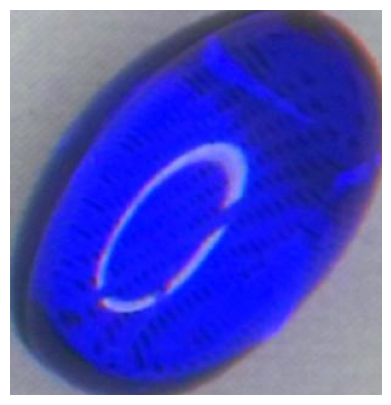

In [49]:
img = cv2.imread("./individual_pills_transparent/pill_1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis(False)
plt.show()

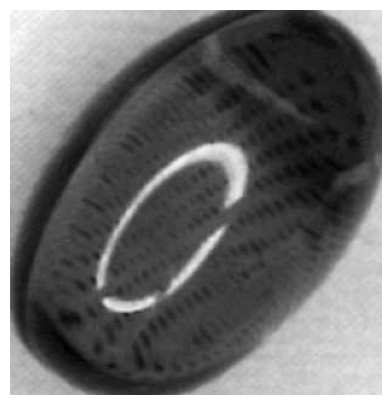

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(gray, cmap="gray")
plt.axis(False)
plt.show()

In [51]:
# Convert the image to a binary image (2D) for regionprops
binary_img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)  # Convert to grayscale
binary_img = binary_img > 0  # Convert to binary (True for non-zero pixels)

props = skimage.measure.regionprops(binary_img.astype(int))[0]
features = {}  # your single object

features["area"] = props.area
features["perimeter"] = props.perimeter
features["equivalent_diameter"] = props.equivalent_diameter_area
features["major_axis"] = props.major_axis_length
features["minor_axis"] = props.minor_axis_length
features["eccentricity"] = props.eccentricity
features["extent"] = props.extent
features["solidity"] = props.solidity
features["convex_area"] = props.convex_area
features["euler_number"] = props.euler_number
features["orientation"] = props.orientation

# Derived ones that help linear SVM a lot
features["circularity"] = 4 * np.pi * features["area"] / (features["perimeter"]**2) if features["perimeter"] > 0 else 0
features["aspect_ratio"] = features["major_axis"] / features["minor_axis"] if features["minor_axis"] > 0 else 1
features["compactness"] = features["perimeter"]**2 / (4 * np.pi * features["area"])
features["roundness"] = 4 * features["area"] / (np.pi * features["major_axis"]**2)

In [54]:
intensity_image = gray

# Update the regionprops to include the intensity image
props = skimage.measure.regionprops(binary_img.astype(int), intensity_image=intensity_image)[0]

features["mean_intensity"] = props.mean_intensity
features["max_intensity"] = props.max_intensity
features["min_intensity"] = props.min_intensity
features["intensity_std"] = np.std(intensity_image[props.image])  # or props.intensity_image.std()
features["total_intensity"] = props.area * features["mean_intensity"]

In [55]:
features

{'area': np.float64(98252.0),
 'perimeter': np.float64(1250.0),
 'equivalent_diameter': np.float64(353.69242534908665),
 'major_axis': 368.3476618630828,
 'minor_axis': 355.6458913020084,
 'eccentricity': 0.2603403976364588,
 'extent': np.float64(1.0),
 'solidity': np.float64(1.0),
 'convex_area': np.float64(98252.0),
 'euler_number': np.int64(1),
 'orientation': 0.0,
 'circularity': np.float64(0.7901894691852911),
 'aspect_ratio': 1.0357146557059147,
 'compactness': np.float64(1.2655192697404964),
 'roundness': np.float64(0.9220101101807134),
 'mean_intensity': np.float64(103.88107112323414),
 'max_intensity': np.float64(188.0),
 'min_intensity': np.float64(52.0),
 'intensity_std': np.float64(34.486634599603136),
 'total_intensity': np.float64(10206523.0)}